In [25]:
import pandas as pd
import numpy as np

orcs = pd.read_csv('orcs_cleaned.csv', index_col=0, encoding='utf-8')
orcs

,age,nationality,family,edu_lvl_cl,mil_rank_cl,region
orc_id,,,,,,
2,33,русский,1,среднее,"Солдаты, матросы, сержанты, старшины",Кировская область
3,28,бурят,1,среднее,"Солдаты, матросы, сержанты, старшины",Сахалинская область
4,26,русский,1,среднее,"Солдаты, матросы, сержанты, старшины",Приморский край
5,19,русский,1,среднее,"Солдаты, матросы, сержанты, старшины",Приморский край
8,36,русский,1,среднее,Прапорщики и мичманы,Томская область
...,...,...,...,...,...,...
110825,29,русский,0,среднее,"Солдаты, матросы, сержанты, старшины",Республика Адыгея
110826,37,русский,0,среднее,Старший Офицер,Республика Адыгея
110828,34,русский,1,среднее,Прапорщики и мичманы,Республика Адыгея


In [26]:
targets = orcs.age
features = orcs.drop(['age'], axis=1)
#features = pd.get_dummies(features)
features

,nationality,family,edu_lvl_cl,mil_rank_cl,region
orc_id,,,,,
2,русский,1,среднее,"Солдаты, матросы, сержанты, старшины",Кировская область
3,бурят,1,среднее,"Солдаты, матросы, сержанты, старшины",Сахалинская область
4,русский,1,среднее,"Солдаты, матросы, сержанты, старшины",Приморский край
5,русский,1,среднее,"Солдаты, матросы, сержанты, старшины",Приморский край
8,русский,1,среднее,Прапорщики и мичманы,Томская область
...,...,...,...,...,...
110825,русский,0,среднее,"Солдаты, матросы, сержанты, старшины",Республика Адыгея
110826,русский,0,среднее,Старший Офицер,Республика Адыгея
110828,русский,1,среднее,Прапорщики и мичманы,Республика Адыгея


In [27]:
from sklearn.preprocessing import LabelEncoder

lables = features.columns
size = len(lables)
features
for i in range(size):
    features[lables[i]]= LabelEncoder().fit_transform(features[lables[i]])   
features

,nationality,family,edu_lvl_cl,mil_rank_cl,region
orc_id,,,,,
2,16,1,1,1,21
3,5,1,1,1,65
4,16,1,1,1,42
5,16,1,1,1,42
8,16,1,1,0,71
...,...,...,...,...,...
110825,16,0,1,1,44
110826,16,0,1,2,44
110828,16,1,1,0,44


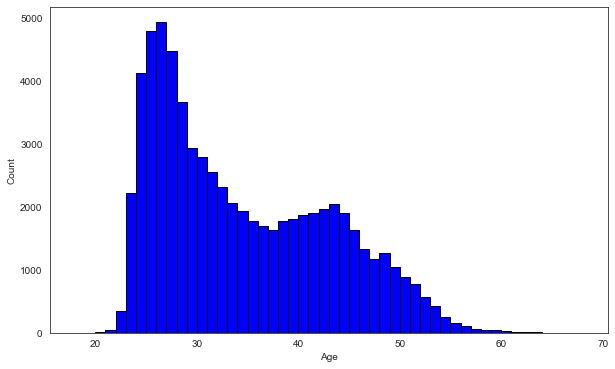

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(orcs.age, bins=50, ec='black', color='b')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


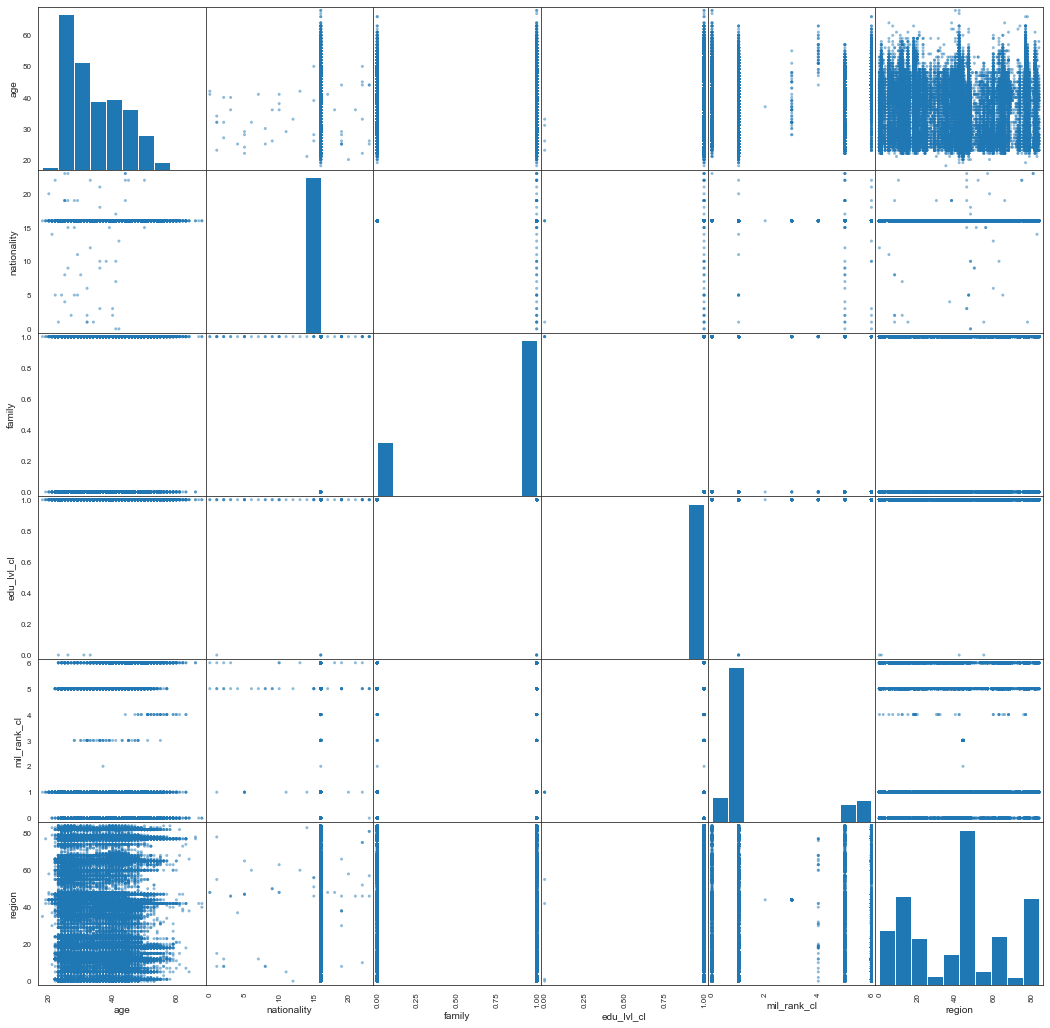

In [50]:
pd.plotting.scatter_matrix(orcs[['age', 'nationality', 'family', 'edu_lvl_cl',  'mil_rank_cl', 'region']], figsize=(18,18))
print("")


In [29]:
temp_orcs = orcs

for i in range(size):
    temp_orcs[lables[i]] = features[lables[i]]
temp_orcs.corr()

,age,nationality,family,edu_lvl_cl,mil_rank_cl,region
age,1.000000,0.003350,-0.000342,0.005214,0.366813,0.037185
nationality,0.003350,1.000000,-0.007489,0.118146,-0.018466,0.004776
family,-0.000342,-0.007489,1.000000,-0.004524,0.005718,-0.002186
edu_lvl_cl,0.005214,0.118146,-0.004524,1.000000,0.002973,0.004799
mil_rank_cl,0.366813,-0.018466,0.005718,0.002973,1.000000,0.016456
region,0.037185,0.004776,-0.002186,0.004799,0.016456,1.000000


In [30]:
mask = np.zeros_like(temp_orcs.corr())
triangle_indeces = np.triu_indices_from(mask)
mask[triangle_indeces] = True
mask

array([[1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1.]])

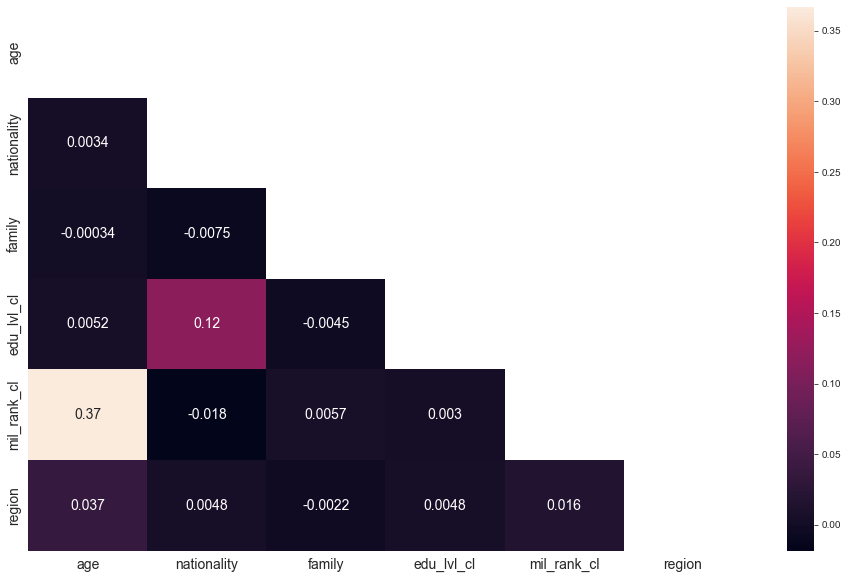

In [31]:
import seaborn as sns

Mask = np.zeros_like(temp_orcs.corr())
triangle_indeces = np.triu_indices_from(Mask)
Mask[triangle_indeces] = True

plt.figure(figsize=(16,10))
sns.heatmap(temp_orcs.corr(), mask=Mask, annot = True, annot_kws={"size" : 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, targets, random_state=50)

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     1585.
Date:                Fri, 17 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:19:40   Log-Likelihood:            -1.7660e+05
No. Observations:               50582   AIC:                         3.532e+05
Df Residuals:                   50576   BIC:                         3.533e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          23.2242      5.785      4.015      

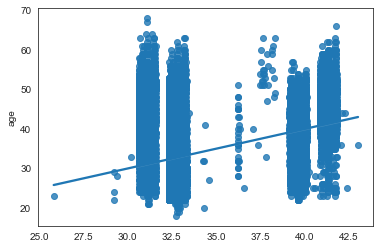

In [53]:
X_incl_const = sm.add_constant(x_train)

model = sm.OLS(y_train, X_incl_const)
result= model.fit()
print(result.summary())
r=result.predict(X_incl_const)
r=np.array(result)
sns.regplot(result.fittedvalues.copy(), y_train)
plt.show()

In [33]:
import statsmodels.api as sm

X_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, X_incl_const)
result = model.fit()

pd.DataFrame({'coef': result.params, 'p-values': round(result.pvalues,3)})

,coef,p-values
const,23.224163,0.000
nationality,0.331367,0.041
family,-0.060867,0.450
edu_lvl_cl,2.161511,0.707
mil_rank_cl,1.703322,0.000
region,0.011313,0.000


Бачимо, що p-values у колонок nationality, family, та edu_lvl_cl - завелике. Перевіримо на мультиколеніарність

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, X_incl_const)
result = model.fit()

vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx = i) for i in range(X_incl_const.shape[1])]

pd.DataFrame({'coef_name': X_incl_const.columns, 'vif': np.around(vif, 2)})

,coef_name,vif
0,const,26815.39
1,nationality,1.05
2,family,1.00
3,edu_lvl_cl,1.05
4,mil_rank_cl,1.00
5,region,1.00


Всі дані мають vif < 5, тому спробуємо побудувати модель використовуючи BIC

In [35]:
X_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, X_incl_const)
result = model.fit()    

#org_coef = pd.DataFrame({'coef': result.params, 'p-values': round(result.pvalues,3)})

print('BIC: \t', result.bic)

print('R-squared:', result.rsquared)

BIC: 	 353270.71540205885
R-squared: 0.13544893139927106


Спробуємо по черзі прибирати поля що мають великий P-value

In [36]:
X_incl_const = sm.add_constant(x_train)
X_incl_const = X_incl_const.drop(['nationality'], axis=1)

model = sm.OLS(y_train, X_incl_const)
result = model.fit() 

print('BIC: \t', result.bic)

print('R-squared:', result.rsquared)

BIC: 	 353264.0763201423
R-squared: 0.1353772738734681


In [63]:
X_incl_const = sm.add_constant(x_train)
X_incl_const = X_incl_const.drop(['nationality', 'family'], axis=1)

model = sm.OLS(y_train, X_incl_const)
result = model.fit() 

print('BIC: \t', result.bic)

print('R-squared:', result.rsquared)

BIC: 	 353253.83233709953
R-squared: 0.13536723364798064


результат покращився, ал незначно :(

In [38]:
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings('ignore')

lables = features.columns

length = len(lables)

#for i in range(2, 5):
#    for label in range(length):
#        features[f"{lables[label]}_{i}"] = np.power(scale(features[lables[label]]), i)

features = StandardScaler().fit_transform(features)
features

array([[ 1.27484433e-02,  5.87423962e-01,  7.70148431e-03,
        -3.85984098e-01, -7.63818614e-01],
       [-4.50240415e+01,  5.87423962e-01,  7.70148431e-03,
        -3.85984098e-01,  1.00485196e+00],
       [ 1.27484433e-02,  5.87423962e-01,  7.70148431e-03,
        -3.85984098e-01,  8.03196151e-02],
       ...,
       [ 1.27484433e-02,  5.87423962e-01,  7.70148431e-03,
        -9.30106951e-01,  1.60713732e-01],
       [ 1.27484433e-02,  5.87423962e-01,  7.70148431e-03,
        -3.85984098e-01, -1.24618332e+00],
       [ 1.27484433e-02,  5.87423962e-01,  7.70148431e-03,
        -3.85984098e-01,  1.60713732e-01]])

In [65]:
from sklearn.metrics import r2_score
import time

def get_metrics(predicted_train, model_train, predicted_test, model_test):
    print("Train R-squared:", r2_score(y_train_prediced, y_train))
    print("Test R-squared:\t", r2_score(y_test_prediced, y_test), "\n")

In [111]:
regression_results = pd.DataFrame(columns = ['method', 'train_score', 'test_score', 'training_time'])

In [112]:
from sklearn.linear_model import LinearRegression

t_start = time.perf_counter()
model = LinearRegression().fit(x_train, y_train)
t_diff = time.perf_counter() - t_start
train_score = model.score(x_train, y_train)
best_test_score = model.score(x_test, y_test)
regression_results = regression_results.append({'method':'Linear Regression', 'train_score':train_score, 'test_score': best_test_score, 'training_time': t_diff}, ignore_index=True)
pd.DataFrame(data=model.coef_, index = lables, columns=['coef'])


,coef
nationality,0.331367
family,-0.060867
edu_lvl_cl,2.161511
mil_rank_cl,1.703322
region,0.011313


In [115]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import sys

t_diff, train_score
best_model = 0
best_test_score = -sys.maxsize - 1
for i in range(2, 5):
    t_start = time.perf_counter()
    model = make_pipeline(PolynomialFeatures(degree=i), LinearRegression()).fit(x_train, y_train)
    test_score = model.score(x_test, y_test)
    if(test_score > best_test_score):
        best_model = model
        t_diff = time.perf_counter() - t_start
        train_score = model.score(x_train, y_train)
        best_test_score = test_score

regression_results = regression_results.append({'method':'Linear Regression with PolynomialFeatures', 'train_score':train_score, 'test_score': best_test_score, 'training_time': t_diff}, ignore_index=True)

AttributeError: 'Pipeline' object has no attribute 'coef_'

In [119]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV 
params_dict = {
    'params':[
        {
        "loss": ["squared_error", "absolute_error"],
        "learning_rate": [0.01, 0.05, 0.1, 0.2],
        "min_samples_split": np.linspace(0.1, 0.5, 12),
        "min_samples_leaf": np.linspace(0.1, 0.5, 12),
        "max_depth": [3, 5, 8],
        "max_features": ["log2", "sqrt"],
        "alpha": [0, 0.3, 0.5, 0.7, 1.0],
        "subsample": [0.5, 0.7, 0.9, 1.0],
        "n_estimators": [50, 100, 150, 200]
        }
    ]
}   

grid = GridSearchCV(GradientBoostingRegressor(), params_dict['params'], 
                            refit=True, cv=3, scoring='accuracy', n_jobs=3)
t_start = time.perf_counter()                            
model = grid.fit(x_train, y_train)
t_diff = time.perf_counter() - t_start
test_score = model.score(x_test, y_test)
best_test_score = model.score(x_test, y_test)
regression_results = regression_results.append({'method':'Gradient Boosting Regressor', 'train_score':train_score, 'test_score': best_test_score, 'training_time': t_diff}, ignore_index=True)


In [ ]:
from sklearn.linear_model import LogisticRegression
params_dict = {
    'params':[
        {
        "C": np.logspace(-3, 3, 7), 
        "penalty": ["l1", "l2"] # l1 lasso l2 ridge
        }
    ]
}

grid = GridSearchCV(LogisticRegression(), params_dict['params'], 
                            refit=True, cv=3, scoring='accuracy', n_jobs=3)
t_start = time.perf_counter()
model = grid.fit(x_train, y_train)
t_diff = time.perf_counter() - t_start
test_score = model.score(x_test, y_test)
best_test_score = model.score(x_test, y_test)
regression_results = regression_results.append({'method':'Logistic Regression', 'train_score':train_score, 'test_score': best_test_score, 'training_time': t_diff}, ignore_index=True)


In [ ]:
from sklearn.linear_model import ElasticNet

params_dict = {
    'params':[
        {
        "alpha": [0, 0.3, 0.5, 0.7, 1.0], 
        "l1_ratio": [0, 0.3, 0.5, 0.7, 1.0]
        }
    ]
}

grid = GridSearchCV(ElasticNet(), params_dict['params'], 
                            refit=True, cv=3, scoring='accuracy', n_jobs=3)
t_start = time.perf_counter()
model = grid.fit(x_train, y_train)
t_diff = time.perf_counter() - t_start
test_score = model.score(x_test, y_test)
best_test_score = model.score(x_test, y_test)
regression_results = regression_results.append({'method':'Elastic Net Regression', 'train_score':train_score, 'test_score': best_test_score, 'training_time': t_diff}, ignore_index=True)


In [117]:
print(regression_results)

                                      method  train_score  test_score  \
0                          Linear Regression     0.135449    0.136038   
1  Linear Regression with PolynomialFeatures     0.376602    0.370259   
2  Linear Regression with PolynomialFeatures     0.376602    0.370259   
3                          Linear Regression     0.376602    0.427074   

   training_time  
0       0.031219  
1       0.161046  
2       0.171937  
3       0.171937  
